
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Sistemas de Recomendación

## Objetivos del Laboratorio

1.	Implementar y comparar diferentes tipos de sistemas de recomendación utilizando datos reales.

2.	Explorar el impacto de las características de los datos en la calidad de las recomendaciones.

3.	Desarrollar habilidades en preprocesamiento, modelado y evaluación de sistemas de recomendación.


## Los problemas

A lo largo de este laboratorio deberás enfrentarte a distintos casos prácticos:

- **Caso 1: Sistema de Recomendación Basado en Contenido**

	Debes construir un sistema que recomiende videojuegos similares basándose en su descripción y géneros. Para eso deberás:

	- Preprocesar las descripciones de los juegos (texto) utilizando técnicas de NLP aprendidas durante la clase.

	- Extraer y limpiar las etiquetas de género para su uso en el sistema de recomendación.

	- Implementar una métrica de similitud (como el coseno) para recomendar juegos similares.

	- Evaluar las recomendaciones generadas para un conjunto de juegos específicos.

- **Caso 2: Sistema de Recomendación Basado en Popularidad**

	Debes un sistema que recomiende los juegos más populares según su calificación general y número de reseñas. Para eso deberás:
	
	- Limpiar y convertir las columnas relacionadas con las calificaciones y las reseñas en datos numéricos.
	
	- Identificar los juegos más populares utilizando métricas como la mediana de calificaciones ponderadas.
	
	- Crear una tabla de recomendaciones generales para diferentes géneros.

## Los Datos


- **1. games_description.csv**: Este archivo contiene información detallada sobre videojuegos disponibles en una tienda. Las columnas que tenemos son: 


	- **`name`**: Nombre del videojuego.

	- **`short_description`**: Breve descripción del videojuego.

	- **`long_description`**: Descripción completa y detallada del videojuego.

	- **`genres`**: Lista de géneros asociados al videojuego (por ejemplo, Acción, RPG).

	- **`minimum_system_requirement`**: Requisitos mínimos para ejecutar el videojuego.

	- **`recommend_system_requirement`**: Requisitos recomendados para ejecutar el videojuego.

	- **`release_date`**: Fecha de lanzamiento del videojuego.

	- **`developer`**: Nombre del desarrollador del videojuego.

	- **`publisher`**: Nombre del publicador del videojuego.

	- **`overall_player_rating`**: Calificación general de los jugadores (categórica).

	- **`number_of_reviews_from_purchased_people`**: Número de reseñas realizadas por personas que compraron el juego.

	- **`number_of_english_reviews`**: Número de reseñas en inglés.

	- **`link`**: Enlace al videojuego en la tienda.


- **2. games_ranking.csv**: Este archivo contiene información sobre el ranking de videojuegos basados en diferentes métricas. Las columnsa que tenemos son:


	- **`game_name`**: Nombre del videojuego.

	- **`genre`**: Género principal del videojuego.

	- **`rank_type`**: Tipo de ranking (por ejemplo, ventas, popularidad).

	- **`rank`**: Posición del videojuego en el ranking correspondiente.

----

- Los datos del archivo `games_description.csv` pueden utilizarse para construir sistemas de recomendación basados en contenido.
- Los datos del archivo `games_ranking.csv` son ideales para implementar sistemas basados en popularidad.


---
---
## Importamos Librerías, Configuraciones y Datos

In [1]:
%load_ext autoreload
%autoreload 2

from config import *

---
---
## Construcción Modelo Recomendación basado en Descripción y Géneros

In [2]:
df = pd.read_csv(f"{DATOS_RUTA_BASE}/games_description.csv").reset_index(drop=True)
df.sample(2)

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
143,theHunter: Call of the Wild™,Discover an atmospheric hunting game like no o...,About This Game\n\t\t\t\t\t\t\tDiscover an atm...,"['Hunting', 'Open World', 'Multiplayer', 'Natu...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"16 Feb, 2017",['Expansive Worlds'],['Expansive Worlds'],Very Positive,"(136,012)","59,053",https://store.steampowered.com/app/518790/theH...
87,Lost Judgment,When a police officer discloses the murder of ...,About This Game\n\t\t\t\t\t\t\tWhen a convicte...,"['Action', 'Adventure', ""Beat 'em up"", 'Action...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"14 Sep, 2022",['Ryu Ga Gotoku Studio'],['SEGA'],Very Positive,"(4,682)","2,960",https://store.steampowered.com/app/2058190/Los...


## Seleccionamos solo las variables que nos interesan

In [3]:
df_games = df[['name', 'short_description', 'long_description', 'genres']]
df_games.sample(3)

,name,short_description,long_description,genres
21,Street Fighter™ 6,Here comes Capcom’s newest challenger! Street ...,About This Game\n\t\t\t\t\t\t\tHere comes Capc...,"['2D Fighter', 'Fighting', 'Character Customiz..."
171,Sid Meier’s Civilization® VI,Civilization VI is the newest installment in t...,About This Game\nCivilization VI offers new wa...,"['Strategy', 'Turn-Based Strategy', 'Multiplay..."
217,Stacklands,Stacklands is a village builder where you stac...,About This Game\nStacklands is a village build...,"['Card Game', 'Management', 'Survival', 'Card ..."


## Vemos si tenemos nulos o duplicados

In [4]:
# porcentaje nulos
(df_games.isna().sum() / df_games.shape[0]) * 100

name                0.00
short_description   4.48
long_description    0.00
genres              0.00
dtype: float64

In [5]:
df_games['short_description'].fillna(' ', inplace=True)

In [6]:
df_games.duplicated().sum()

0

## Limpiamos el contenido

In [7]:
df_games.sample(3)

,name,short_description,long_description,genres
54,Dying Light,First-person action survival game set in a pos...,About This Game\nFrom the creators of hit titl...,"['Zombies', 'Survival Horror', 'Horror', 'Onli..."
269,MXGP 2021 - The Official Motocross Videogame,All the power of Motocross in your hands: the ...,About This Game\n\t\t\t\t\t\t\tAll the power o...,"['Racing', 'Simulation', 'Sports', 'Bikes', 'M..."
164,People Playground,"Shoot, stab, burn, poison, tear, vaporise, or ...","About This Game\n\t\t\t\t\t\t\tShoot, stab, bu...","['Sandbox', 'Gore', 'Physics', 'Blood', 'Modda..."


#### eliminamos los \n y los \t de 'long_description'

In [8]:
df_games['long_description'] = df_games['long_description'].map(lambda x: x.replace('\n',' ').replace('\t',''))

In [9]:
df_games.sample(3)

,name,short_description,long_description,genres
56,Unturned,You're a survivor in the zombie infested ruins...,About This Game STAY UNTURNEDYou're one of the...,"['Free to Play', 'Survival', 'Zombies', 'Multi..."
232,EA SPORTS™ WRC,Build the car of your dreams in our biggest ra...,About This Game Build the car of your dreams i...,"['Racing', 'Simulation', 'Automobile Sim', 'Sp..."
123,Yakuza 0,SEGA’s legendary Japanese series finally comes...,"About This Game The glitz, glamour, and unbrid...","['Story Rich', 'Action', ""Beat 'em up"", 'Great..."


#### limpiamos genres

In [10]:
df_games['genres'] = df_games['genres'].map(lambda x: x.lstrip("['").replace("', '", ' ').rstrip("']"))

In [11]:
df_games.sample(3)

,name,short_description,long_description,genres
261,Motordoom,Motördoom is a freestyle-sports roguelite hord...,About This Game Motördoom is a freestyle-sport...,Skateboarding BMX Roguelite Arcade Action Rogu...
256,Slime Volley,🏐 Step into the bouncy and exciting arcade gam...,About This Game Get Ready for Bouncy Arcade Fu...,Volleyball 2D Tennis Sports Arcade PvP Basketb...
149,Dyson Sphere Program,Build the most efficient intergalactic factory...,About This Game Dyson Sphere Program is a sci-...,Space Automation Base Building Building Open W...


#### Unimos las descripciones y los generos

In [12]:
df_games['content'] = df_games['short_description'] + " " + df_games['long_description'] + " " + df_games['genres']
df_games.drop(columns=['short_description', 'long_description', 'genres'], inplace = True)

In [13]:
df_games.sample(3)

,name,content
125,Mount & Blade II: Bannerlord,"A strategy/action RPG. Create a character, eng..."
69,Persona 3 Reload,Dive into the Dark Hour and awaken the depths ...
37,FINAL FANTASY XIV Online,Join over 30 million adventurers worldwide and...


#### Vectorizamos el contenido

In [14]:
vectorizer = CountVectorizer(max_features=1500, stop_words='english')

X = vectorizer.fit_transform(df_games['content']).toarray()

similarity = cosine_similarity(X)
X[:20]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 8],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### definimos juego que le gusat al usuario

In [15]:
game_liked_user = 'Call of Duty®'

movie_index = sup_reco.get_index_from_register(dataframe=df_games, column='name', name=game_liked_user)

movie_index

20

#### sacamos películas similares

In [16]:
similar_games = list(enumerate(similarity[movie_index]))
similar_games[:3]

[(0, 0.07601843138275106), (1, 0.0755520666784773), (2, 0.10931020776502581)]

In [17]:
ordered_similar_games = sorted(similar_games,key=lambda x:x[1],reverse=True)[1:21] # [1:21] si lo cambiamos a [0:21] la tenemos a ella misma 
ordered_similar_games[:3]

[(28, 0.7045099992579257), (23, 0.5853112219368807), (17, 0.5599315183416234)]

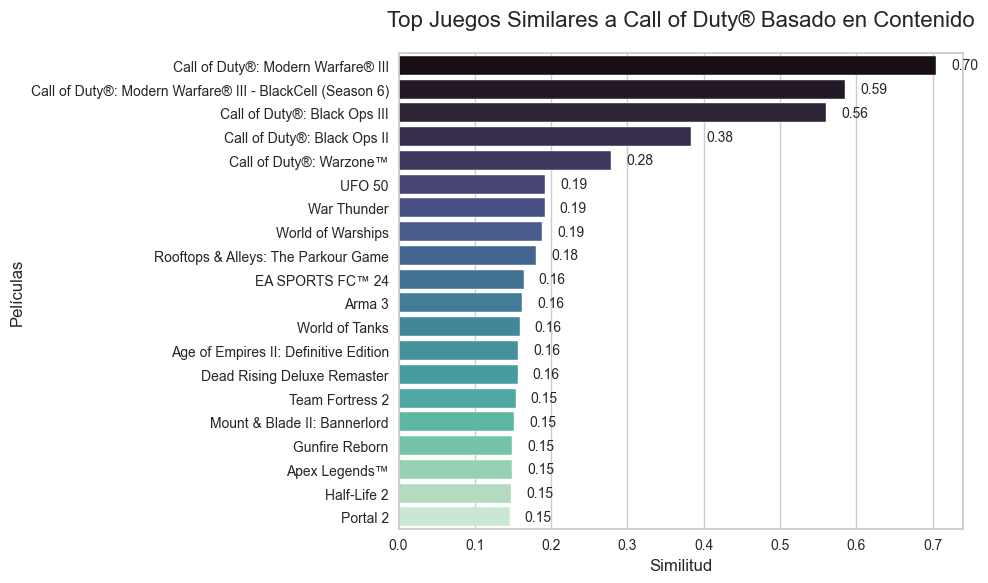

In [18]:
# y ahora buscamos el título
top_similar_games = {}
for i in ordered_similar_games:
    top_similar_games[sup_reco.get_name_from_index(df_games, 'name', i[0])] = i[1]

# visualizamos los resultados
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crear gráfico de barras
sns.barplot(
    x=list(top_similar_games.values()), 
    y=list(top_similar_games.keys()), 
    palette="mako"
)

# Añadir etiquetas y título
plt.title(f"Top Juegos Similares a {game_liked_user} Basado en Contenido", fontsize=16, pad=20)
plt.xlabel("Similitud", fontsize=12)
plt.ylabel("Películas", fontsize=12)

# Añadir valores al final de cada barra
for i, value in enumerate(top_similar_games.values()):
    plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()


---
---
## Caso 2: Sistema de recomendación Basado en Popularidad
- Limpiar y convertir las columnas relacionadas con las calificaciones y las reseñas en datos numéricos.
	
- Identificar los juegos más populares utilizando métricas como la mediana de calificaciones ponderadas.

- Crear una tabla de recomendaciones generales para diferentes géneros.

In [19]:
df_caso2 = pd.read_csv(f"{DATOS_RUTA_BASE}/games_ranking.csv")
df_caso2.sample(3)

,game_name,genre,rank_type,rank
635,Descenders,Sports & Racing,Review,4
356,War Thunder,Simulation,Revenue,5
422,Stellaris,Simulation,Review,31


In [20]:
df_caso2['rank_type'].unique()

array(['Sales', 'Revenue', 'Review'], dtype=object)

In [21]:
df_rank = df_caso2[df_caso2['rank_type'] == 'Review']
df_rank['rank_type'].unique()

array(['Review'], dtype=object)

In [22]:
df_rank.drop(columns=['rank_type'], inplace=True)

In [23]:
generos = df_rank['genre'].unique()

In [24]:
for genero in generos:
    nombre_variable = f"df_{genero.lower().replace('-','_').replace('&','').replace(' ','_')}"
    globals()[nombre_variable] = df_rank[df_rank['genre'] == genero]
    print(f"Variable '{nombre_variable}' creada")


Variable 'df_action' creada
Variable 'df_adventure' creada
Variable 'df_role_playing' creada
Variable 'df_simulation' creada
Variable 'df_strategy' creada
Variable 'df_sports__racing' creada


In [25]:
lista_dfs = [df_action, df_adventure, df_role_playing, df_simulation, df_strategy, df_sports__racing]

#### vemos que ya los tenemos agrupados

In [26]:
df_adventure

,game_name,genre,rank
196,Terraria,Adventure,1
197,Grand Theft Auto V,Adventure,2
198,The Witcher 3: Wild Hunt,Adventure,3
199,Baldur's Gate 3,Adventure,4
200,Black Myth: Wukong,Adventure,5
201,Rust,Adventure,6
202,The Forest,Adventure,7
203,Red Dead Redemption 2,Adventure,8
204,Lethal Company,Adventure,9
205,Hollow Knight,Adventure,10


In [35]:
for df_ in lista_dfs:
    display(HTML(f"<h2>Top mejores juegos de <b>{df_['genre'].unique()[0]}</b></h2>"))
    display(df_[['game_name','rank']][:10])
    display(HTML("<hr><hr>"))

,game_name,rank
76,Counter-Strike 2,1
77,Grand Theft Auto V,2
78,Dota 2,3
79,Terraria,4
80,Black Myth: Wukong,5
81,Wallpaper Engine,6
82,Tom Clancy's Rainbow Six® Siege,7
83,Left 4 Dead 2,8
84,The Witcher 3: Wild Hunt,9
85,Team Fortress 2,10


,game_name,rank
196,Terraria,1
197,Grand Theft Auto V,2
198,The Witcher 3: Wild Hunt,3
199,Baldur's Gate 3,4
200,Black Myth: Wukong,5
201,Rust,6
202,The Forest,7
203,Red Dead Redemption 2,8
204,Lethal Company,9
205,Hollow Knight,10


,game_name,rank
272,Dota 2,1
273,The Witcher 3: Wild Hunt,2
274,Black Myth: Wukong,3
275,Baldur's Gate 3,4
276,Stardew Valley,5
277,ELDEN RING,6
278,Divinity: Original Sin 2 - Definitive Edition,7
279,Warframe,8
280,Cyberpunk 2077,9
281,Destiny 2,10


,game_name,rank
392,Garry's Mod,1
393,Stardew Valley,2
394,Euro Truck Simulator 2,3
395,The Forest,4
396,BeamNG.drive,5
397,People Playground,6
398,RimWorld,7
399,Cities: Skylines,8
400,American Truck Simulator,9
401,Totally Accurate Battle Simulator,10


,game_name,rank
512,Dota 2,1
513,Sid Meier’s Civilization® VI,2
514,Sid Meier's Civilization® V,3
515,Bloons TD 6,4
516,Hearts of Iron IV,5
517,Divinity: Original Sin 2 - Definitive Edition,6
518,RimWorld,7
519,Total War: WARHAMMER II,8
520,Tabletop Simulator,9
521,Crusader Kings III,10


,game_name,rank
632,All-In-One Sports VR,1
633,Riders Republic,2
634,The Ramp,3
635,Descenders,4
636,Motordoom,5
637,Sledders,6
638,Monster Energy Supercross - The Official Video...,7
639,Golf With Your Friends,8
640,Skater XL - The Ultimate Skateboarding Game,9
641,TrackDayR,10
